In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)
# reflect the tables
Station = Base.classes.station
Measurement = Base.classes.measurement

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

/Users/sushilbaskota/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


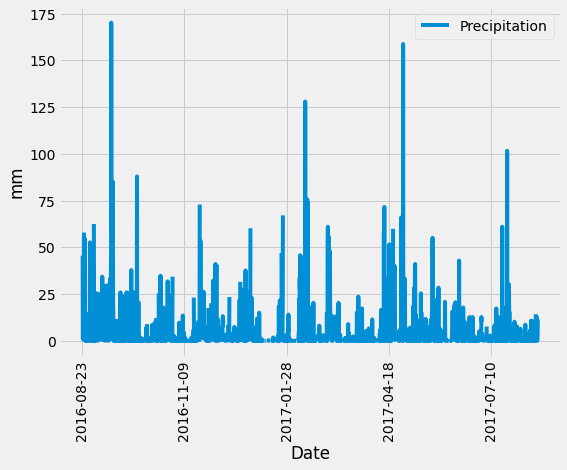

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
date_1_year = date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
outcome = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_1_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_dict = [{'Date':row[0],'Precipitation':row[1] } for row in outcome]
df = pd.DataFrame(df_dict).set_index("Date")

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
dateprec_bar = df.plot(rot=90 , figsize =(8,6))
dateprec_bar.set_ylabel('mm')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(Measurement.station.distinct())).first()
print(f'Total number of staions: {total_station[0]}')

Total number of staions: 9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min (Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
act_stn =session.query(*sel).filter(Measurement.station == 'USC00519281').all()
act_stn

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

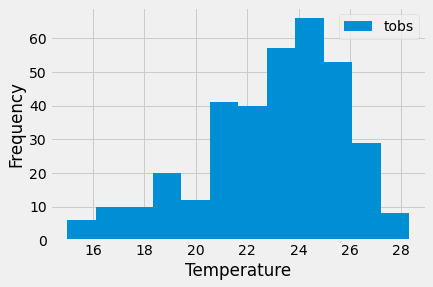

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.tobs).\
           filter(Measurement.station == 'USC00519281').\
           filter(Measurement.date >= date_1_year).all()

temp_obs_dict = [{'tobs':row[0]} for row in temp_obs]
temp_obs_df =pd.DataFrame(temp_obs_dict)
temp_hist = temp_obs_df.plot(kind="hist" , bins =12)
temp_hist.set_xlabel("Temperature")
plt.show()

# Close Session

In [17]:
# Close Session
session.close()